In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Daily Data - last 365 rows

from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Want precipitation data from 8/23/2016 to 8/23/2017

measurement_data = []
for row in session.query(Measurement.date,Measurement.prcp).all():
    measurement_data.append(row)
    
measurement_df = pd.DataFrame(measurement_data,columns =['date','precipitation'])

measurement_date_index = measurement_df.set_index('date')

measurement_sorted = measurement_date_index.sort_index(ascending=True)

Aug2016_Aug2017 = measurement_sorted.loc['2016-08-23':'2017-08-23']

Aug2016_Aug2017_no_null = Aug2016_Aug2017.dropna(subset=['precipitation'])

Aug2016_Aug2017_no_null.head()
    

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.70
2016-08-23,1.79
2016-08-23,0.02
2016-08-23,0.15


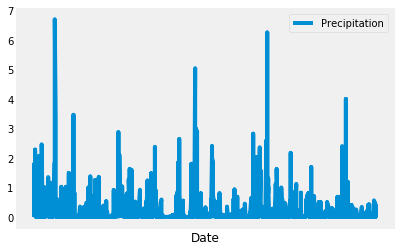

In [12]:
fig, ax = plt.subplots()
plt.plot(Aug2016_Aug2017_no_null,label='Precipitation')
ax.tick_params(labelbottom=False)
ax.set_xlabel('Date')

ax.legend()
ax.grid()
plt.savefig("./Images/Precipitation.png")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

Aug2016_Aug2017_no_null.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

new_station = []
unique_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc())
for station in unique_station:
    new_station.append(station)
new_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

active = []
most_active = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.\
avg(Measurement.tobs)).filter_by(station='USC00519281')
for num in most_active:
    active.append(num)
active

[(54.0, 85.0, 71.66378066378067)]

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Want tobs data from 8/23/2016 to 8/23/2017

active_tobs_data = []
for row in session.query(Measurement.date,Measurement.tobs).filter_by(station='USC00519281'):
    active_tobs_data.append(row)
    
tobs_df = pd.DataFrame(active_tobs_data,columns =['date','tobs'])

tobs_date_index = tobs_df.set_index('date')

tobs_sorted = tobs_date_index.sort_index(ascending=True)

Aug2016_Aug2017_tobs = tobs_sorted.loc['2016-08-23':'2017-08-23']

Aug2016_Aug2017_no_null_tobs = Aug2016_Aug2017_tobs.dropna(subset=['tobs'])

Aug2016_Aug2017_no_null_tobs.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


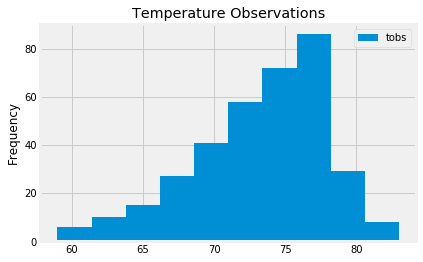

In [69]:
Aug2016_Aug2017_no_null_tobs.hist(column='tobs',label='tobs')

plt.title('Temperature Observations')

plt.ylabel('Frequency')

plt.legend()
plt.savefig("./Images/tobs.png")
plt.show()

In [70]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [153]:
# 2011-02-28 to 2011-03-05
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



(0, 100)

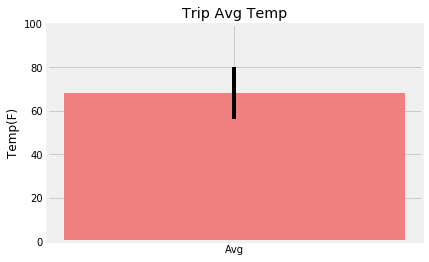

In [152]:
peak_to_peak = 74.0 - 62.0

plt.bar('Avg',68.36585365853658,yerr=peak_to_peak, align="center", width=.25,color='lightcoral')
ax.tick_params(labelbottom=False)
plt.title("Trip Avg Temp")
plt.ylabel('Temp(F)')
plt.ylim(0,100,20)


In [154]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [158]:
rainfall_per_station = []
rain_station = session.query(Measurement.station,Station.name,Station.latitude,Station.\
longitude,Station.elevation,func.sum(Measurement.prcp)).group_by(Measurement.station).\
order_by(func.sum(Measurement.prcp).asc())
for rain in rain_station:
    rainfall_per_station.append(rain)
rainfall_per_station

[('USC00517948',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  390.95999999999873),
 ('USC00518838',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  637.8299999999936),
 ('USC00511918',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  834.119999999968),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1184.5799999999226),
 ('USC00514830',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2110.40999999993),
 ('USC00519523',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2661.120000000018),
 ('USC00513117',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  3443.5800000001063),
 ('USC00519281',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  5297.7600000003895),
 ('USC00516128',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  9612.810000000345)]

In [ ]:
q = (Session.query(Measurement.station,Station.name,Station.latitude,Station.\
longitude,Station.elevation,func.sum(Measurement.prcp))
    .filter(Station.station == Document.author)
    .all())